# EXPLANATORY DATA ANALYSIS ON DATASET_TERRORISM

## import 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/drive/MyDrive/data's sem 3/GT_task_2.csv",encoding = "ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df =  df[["iyear","imonth","iday","country_txt","region_txt",
          "city","latitude","longitude","success","suicide",
          "attacktype1_txt",
          "targtype1_txt","targsubtype1_txt","natlty1_txt",
          "gname","motive","weaptype1_txt",
          "weapsubtype1_txt","nkill","propextent_txt","propvalue","ransom","ransomamt",
          "ransompaid","hostkidoutcome_txt"]]
df.head()

,iyear,imonth,iday,country_txt,region_txt,city,latitude,longitude,success,suicide,attacktype1_txt,targtype1_txt,targsubtype1_txt,natlty1_txt,gname,motive,weaptype1_txt,weapsubtype1_txt,nkill,propextent_txt,propvalue,ransom,ransomamt,ransompaid,hostkidoutcome_txt
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,1,0,Assassination,Private Citizens & Property,Named Civilian,Dominican Republic,MANO-D,NaN,Unknown,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgium,23rd of September Communist League,NaN,Unknown,NaN,0.0,NaN,NaN,1.0,800000.0,NaN,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,1,0,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,United States,Unknown,NaN,Unknown,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,1,0,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,United States,Unknown,NaN,Explosives,Unknown Explosive Type,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,United States,Unknown,NaN,Incendiary,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [5]:
df.rename(columns={'iyear': 'year','imonth': 'month','iday': 'day','country_txt': 'country_name',
            'region_txt': 'region_name','attacktype1_txt': 'attacktype',
            'targtype1_txt': 'targtype',
            'targsubtype1_txt': 'targsubtype','gname': 'terrst_group_name','natlty1_txt': 'targt_natly',
            'weaptype1_txt': 'weaptype',
            'weapsubtype1_txt': 'weapsubtype','nkill': 'casualities',
            'propextent_txt': 'proprty_damage',
            'ransompaid': 'ransom_amt_paid','hostkidoutcome_txt': 'host_outcom',
            }, inplace=True)

In [6]:
df.nunique()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   year               181691 non-null  int64  
 1   month              181691 non-null  int64  
 2   day                181691 non-null  int64  
 3   country_name       181691 non-null  object 
 4   region_name        181691 non-null  object 
 5   city               181257 non-null  object 
 6   latitude           177135 non-null  float64
 7   longitude          177134 non-null  float64
 8   success            181691 non-null  int64  
 9   suicide            181691 non-null  int64  
 10  attacktype         181691 non-null  object 
 11  targtype           181691 non-null  object 
 12  targsubtype        171318 non-null  object 
 13  targt_natly        180132 non-null  object 
 14  terrst_group_name  181691 non-null  object 
 15  motive             50561 non-null   object 
 16  we

## Details 

In [7]:
print("most targeted region: ",df["region_name"].value_counts().index[0] )
print("most targeted nationality: " ,df["targt_natly"].value_counts().index[0])
print("most targeted city: ",df["city"].value_counts().index[1]) # first entry unknown
print("most attack happened in the year of ",df["year"].value_counts().index[0])
print("most prominant terrorist group: ",df["terrst_group_name"].value_counts().index[1]) # first entry unknown 
print("most prominant attack type: ",df["attacktype"].value_counts().index[0])


most targeted region:  Middle East & North Africa
most targeted nationality:  Iraq
most targeted city:  Baghdad
most attack happened in the year of  2014
most prominant terrorist group:  Taliban
most prominant attack type:  Bombing/Explosion


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'No.Of terrorist activities each year')

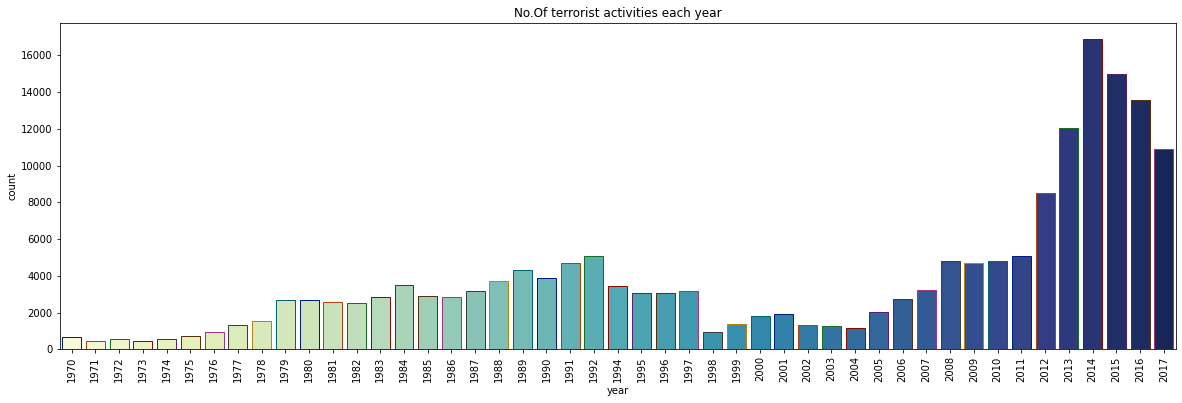

In [8]:
plt.subplots(figsize=(20,6))
sns.countplot("year",data=df,palette='YlGnBu',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('No.Of terrorist activities each year')

Terrorist activity seemingly increasing over the year. Most of this is activities were peak in the year 2014. Almost 36 thousand terrorist attacks were reported in that year alone. 

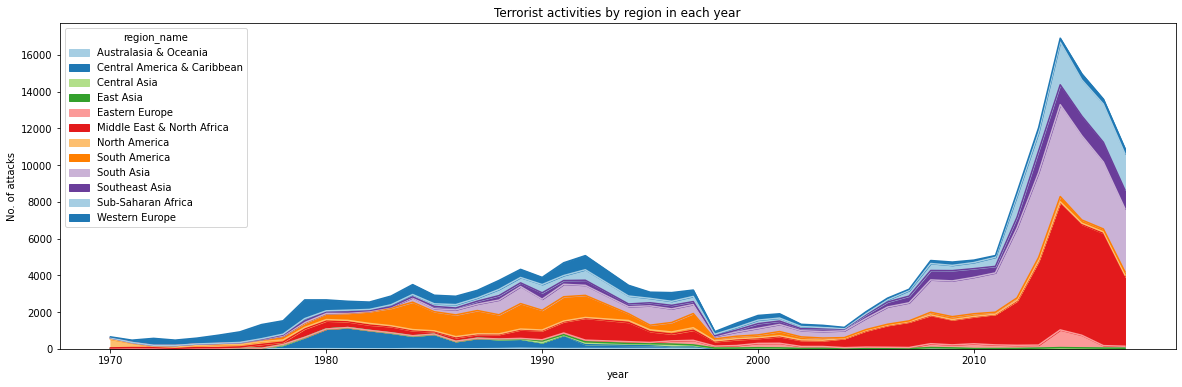

In [9]:
pd.crosstab(df.year, df.region_name).plot(color=sns.color_palette('Paired', 10),kind = "area",figsize = (20,6))
plt.title('Terrorist activities by region in each year')
plt.ylabel('No. of attacks')
plt.show()

Before 2000, terrorist activities were low in Asian countries. but after 2000, the terrorist activity is increasing and the Middle East and 
North African region faced more attacks.  

In [10]:
year_caslty = df.groupby('year').casualities.sum().to_frame().reset_index()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number Of Casualities Each Year caused by Terrorist activity')

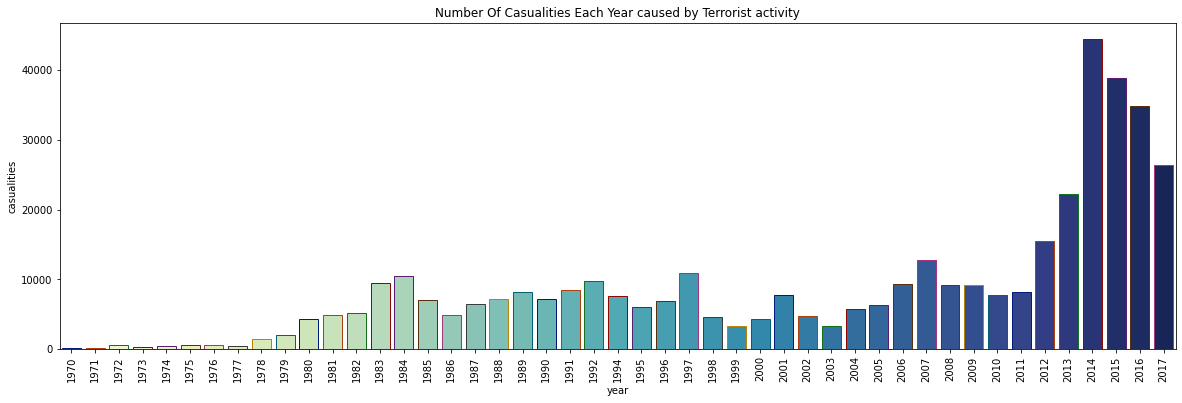

In [11]:
plt.subplots(figsize=(20,6))
sns.barplot(year_caslty.year,year_caslty.casualities, palette='YlGnBu',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number Of Casualities Each Year caused by Terrorist activity')

Most casualties are reported in the year 2014.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Top ten regions got attacked by terrorist')

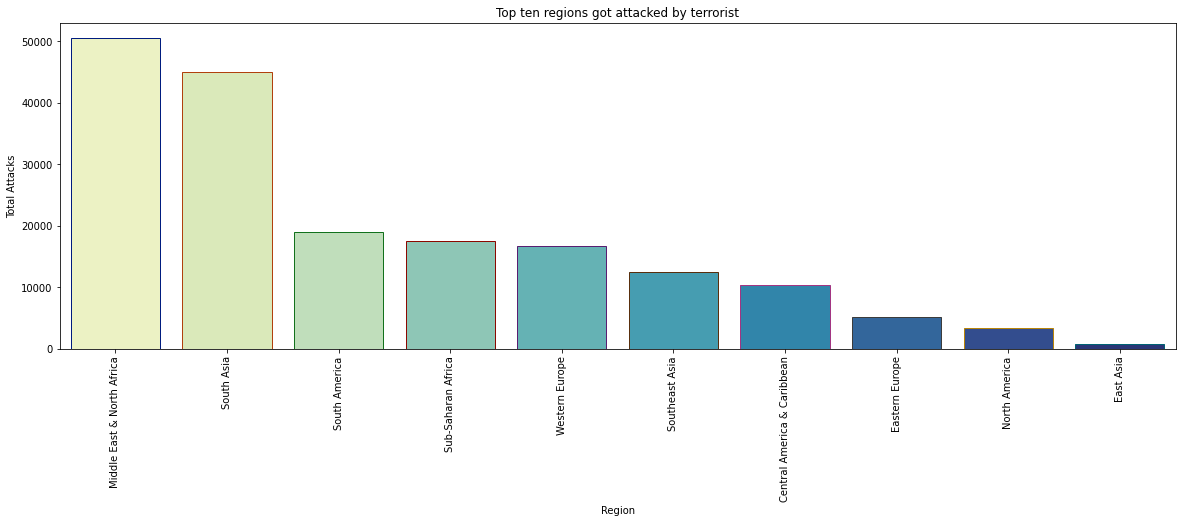

In [12]:
region_atkd = df.region_name.value_counts()[:10].reset_index()
region_atkd.columns = ['Region', 'Total Attacks']
plt.subplots(figsize=(20,6))
sns.barplot(region_atkd.Region,region_atkd["Total Attacks"], palette='YlGnBu',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Top ten regions got attacked by terrorist')

The Middle East and North America faced more attacks. And the region that faced few attacks in East Asia. The second most affected region is South Asia.

In [13]:
cntry_atkd = df.country_name.value_counts()[:10].reset_index()
cntry_atkd.columns = ['Country', 'Total Attacks']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Top ten countries got attacked by terrorist')

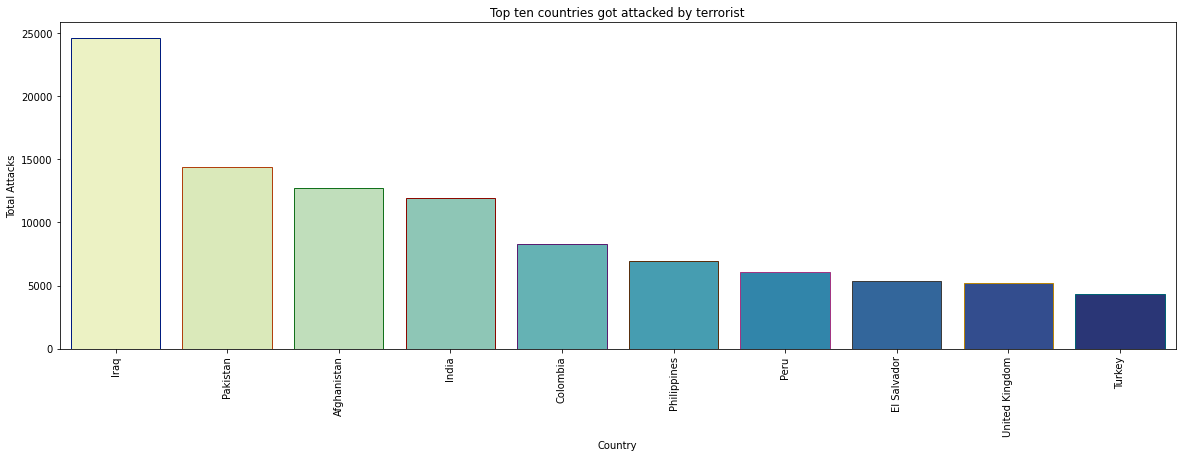

In [14]:
plt.subplots(figsize=(20,6))
sns.barplot(cntry_atkd.Country,cntry_atkd["Total Attacks"], palette='YlGnBu',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Top ten countries got attacked by terrorist')

Iraq and Pakistan faced more attacks.  And Afghanistan had the 3rd highest number of terrorist attacks.

In [15]:
contry_caslty = df.groupby('country_name').casualities.sum().to_frame().reset_index().sort_values("casualities",ascending = False)[:10]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Casualities of the Top ten countries got attacked by terrorist')

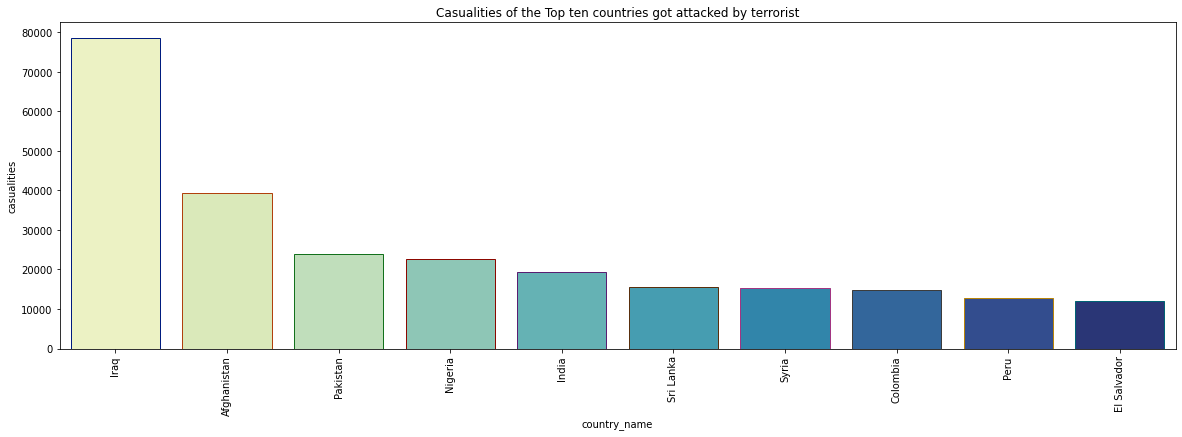

In [16]:
plt.subplots(figsize=(20,6))
sns.barplot(contry_caslty.country_name,contry_caslty.casualities, palette='YlGnBu',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Casualities of the Top ten countries got attacked by terrorist')

Even though, Afghanistan has a lesser number of terrorist movements than Pakistan more fatalities are reported in Afghanistan. Iraq had reported nearly 80 thousand casualties over time. 

In [17]:
city_caslty = df.groupby('city').casualities.sum().to_frame().reset_index().sort_values("casualities",ascending = False)[:10]
city_atkd = df.city.value_counts()[:10].reset_index()
city_atkd.columns = ['city', 'Total Attacks']

In [18]:
city_tot = pd.merge(city_atkd, city_caslty, how='left', on='city').sort_values('Total Attacks', ascending=False)[:10]
print("Top ten cities with more attacks and casualities \n\n",city_tot)

Top ten cities with more attacks and casualities 

            city  Total Attacks  casualities
0       Unknown           9775      22647.0
1       Baghdad           7589      21151.0
2       Karachi           2652       3688.0
3          Lima           2359          NaN
4         Mosul           2265       7140.0
5       Belfast           2171          NaN
6      Santiago           1621          NaN
7     Mogadishu           1581       3913.0
8  San Salvador           1558          NaN
9      Istanbul           1048          NaN


Text(0.5, 1.0, 'Attacktype')

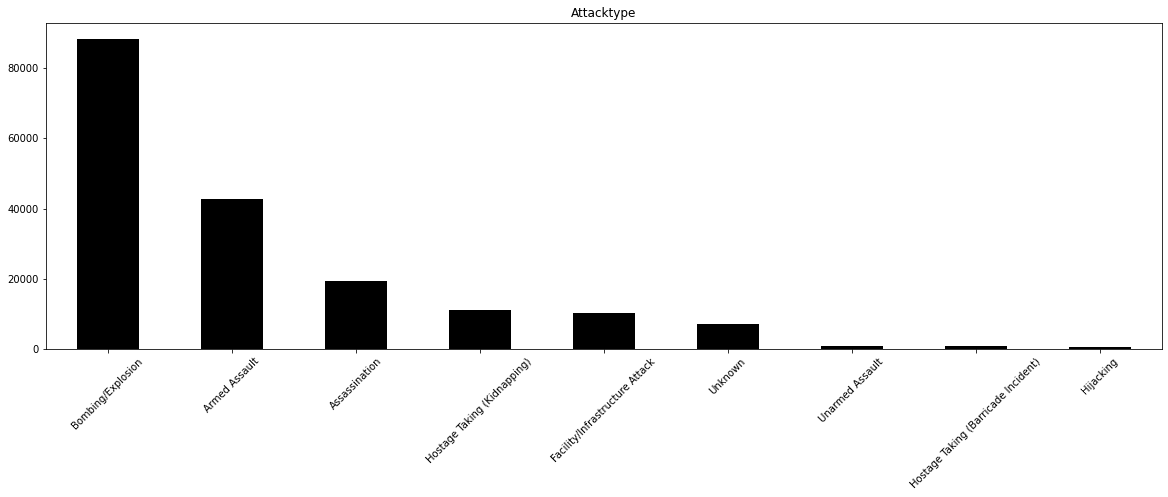

In [19]:
df['attacktype'].value_counts().plot(kind='bar',figsize=(20,6),color='Black')
plt.xticks(rotation = 45)
plt.title("Attacktype")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number Of Casualities caused by attack')

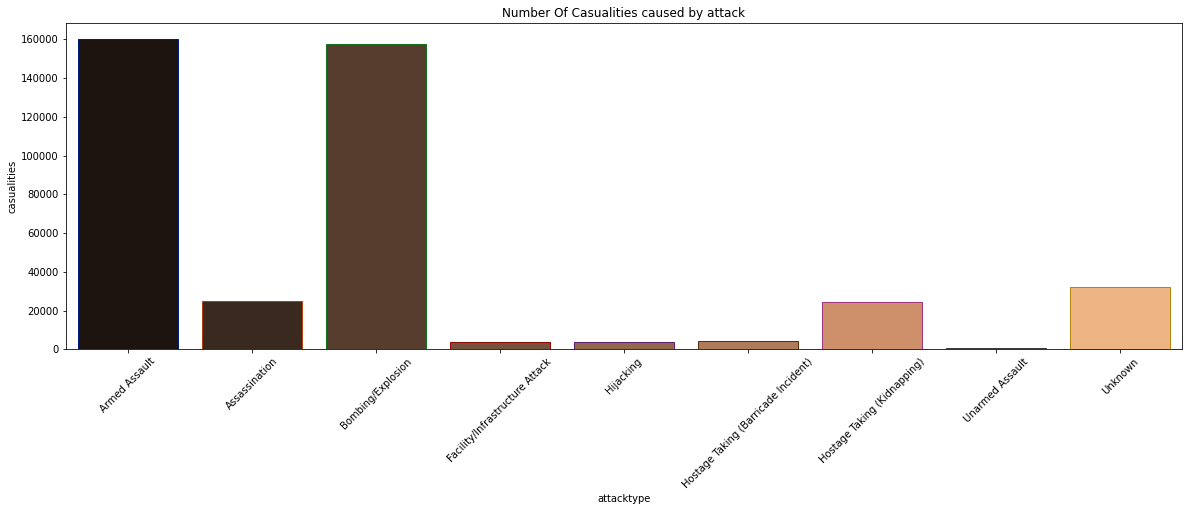

In [20]:
killed_attack = df.groupby('attacktype').casualities.sum().to_frame().reset_index()
plt.subplots(figsize=(20,6))
sns.barplot(killed_attack.attacktype,killed_attack.casualities, palette='copper',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=45)
plt.title('Number Of Casualities caused by attack')

Bombing and explosion was the widely used attack method. Even though,  armed assault caused more casualties. But the number of people killed during bombing and explosions was not low either.  


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Target of attacks')

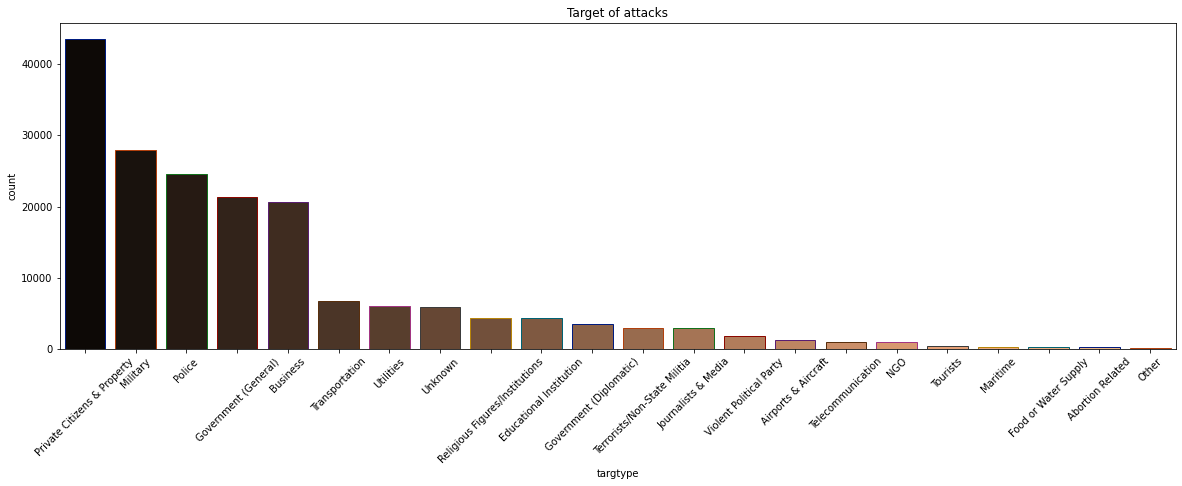

In [21]:
plt.subplots(figsize = (20,6))
sns.countplot(df["targtype"],order =df["targtype"].value_counts().index,palette='copper',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation = 45)
plt.title("Target of attacks")

Text(0.5, 1.0, 'count of each groups attach')

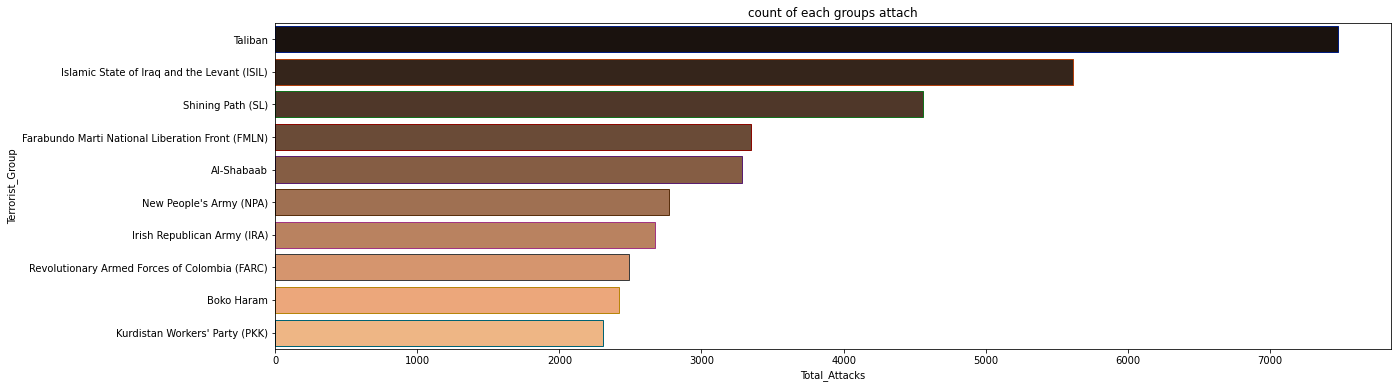

In [22]:
terrst_attack = df.terrst_group_name.value_counts().to_frame().drop("Unknown").reset_index()[:10]
terrst_attack.columns = ['Terrorist_Group', 'Total_Attacks']
plt.subplots(figsize = (20,6))
sns.barplot(x=terrst_attack['Total_Attacks'],y=terrst_attack['Terrorist_Group'],  palette='copper',edgecolor=sns.color_palette('dark', 10))
plt.title("count of each groups attach")

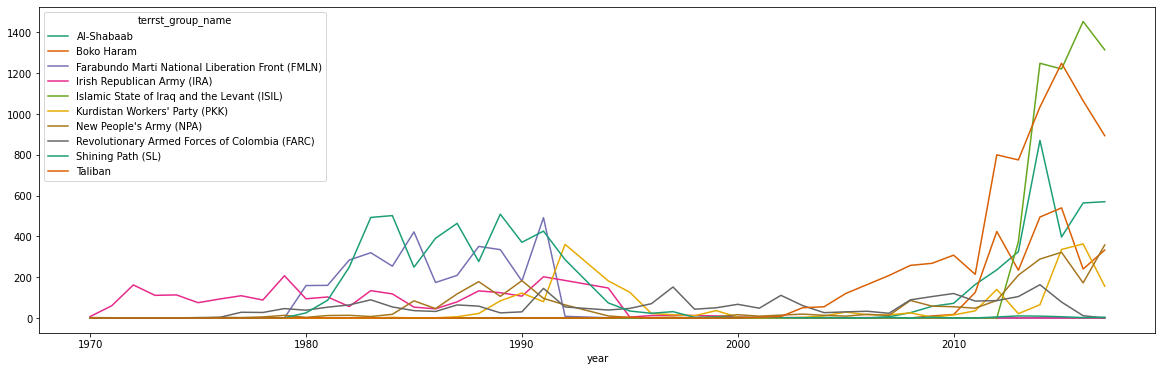

In [23]:
group = df[df.terrst_group_name.isin(df.terrst_group_name.value_counts()[1:11].index)]# 0th position is unknown 
pd.crosstab(group.year, group.terrst_group_name).plot(color=sns.color_palette('Dark2', 10),figsize = (20,6))

In [24]:
df["motive"].value_counts().head(10)


Unknown                                                                                                                                                                                                                                                 14889
The specific motive for the attack is unknown.                                                                                                                                                                                                          14430
The specific motive is unknown; however, sources noted that the attack may have been part of a larger trend of violence related to Bangladesh's nationwide hartal, which began on January 6, 2015.                                                        297
The specific motive for the attack is unknown..                                                                                                                                                                                               

In [25]:
df.host_outcom.value_counts()

Unknown                                           3606
Hostage(s) released by perpetrators               3124
Hostage(s) killed (not during rescue attempt)     2522
Combination                                       1013
Successful Rescue                                  542
Hostage(s) escaped (not during rescue attempt)     165
Attempted Rescue                                    19
Name: host_outcom, dtype: int64

Text(0.5, 1.0, 'Hostages of Terrorist Attack')

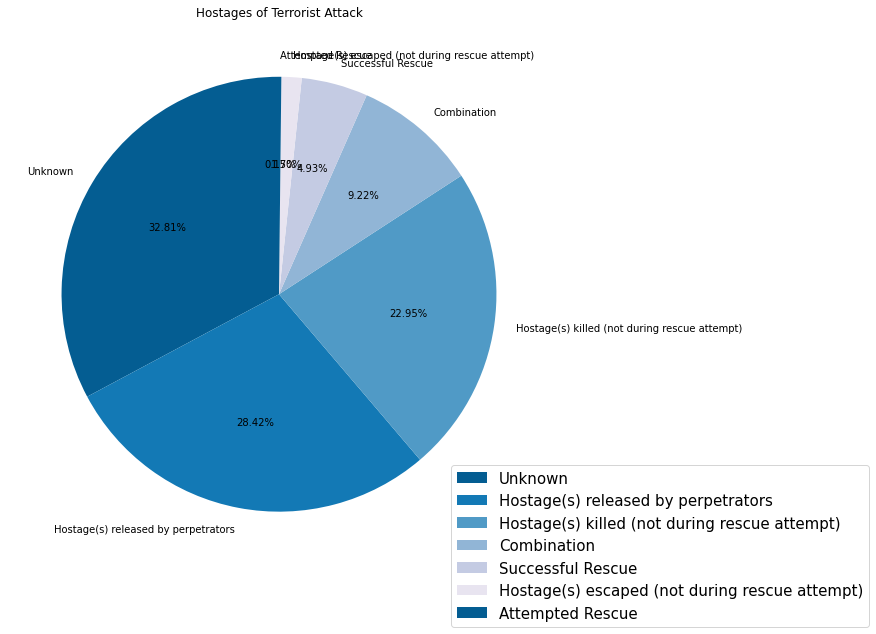

In [26]:
labels = ["Unknown","Hostage(s) released by perpetrators","Hostage(s) killed (not during rescue attempt)","Combination","Successful Rescue",
          "Hostage(s) escaped (not during rescue attempt)","Attempted Rescue"]
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
colors = sns.color_palette('PuBu_r')[0:6]
plt.pie(df.host_outcom.value_counts(), labels =labels,startangle=90, autopct='%.2f%%',colors =colors )
plt.legend(labels, loc='upper right', bbox_to_anchor = (1.6, .2), fontsize=15)
plt.title("Hostages of Terrorist Attack")

In [29]:
!pip install https://github.com/matplotlib/basemap/archive/master.zip

     | 133.1 MB 1.7 MB/s
     |████████████████████████████████| 6.6 MB 5.1 MB/s 
     |████████████████████████████████| 219 kB 65.3 MB/s 
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759609 sha256=7f13542aaecd14e84bc323b930c18846c48a948d5423e554196e20776708069c
  Stored in directory: /tmp/pip-ephem-wheel-cache-4kwt2hj9/wheels/98/1a/9d/de6aa4dee52d726996be77bb4a65cf03865288bfc35e5b24d8
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37325 sha256=4c089524593e9657ca4b39597d4b84fc83ff76ae24d7a2f65591da9dd995be1e
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built basemap pyshp


In [30]:
from mpl_toolkits.basemap import Basemap
from PIL import Image
from pylab import rcParams

In [31]:
map=df[['latitude','longitude']]

In [32]:
map = map.dropna()
map=map.drop(17658)

In [33]:
llat=-55
ulat=75
llon=-180
ulon=180

In [34]:
map=map[(map['longitude']>llon) & (map['longitude']<ulon) & 
      (map['latitude']>llat) & (map['latitude']<ulat)]
print("Number of final datapoints:",len(map))

Number of final datapoints: 177133


In [35]:
my_map=Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat,urcrnrlon=ulon, urcrnrlat=ulat)

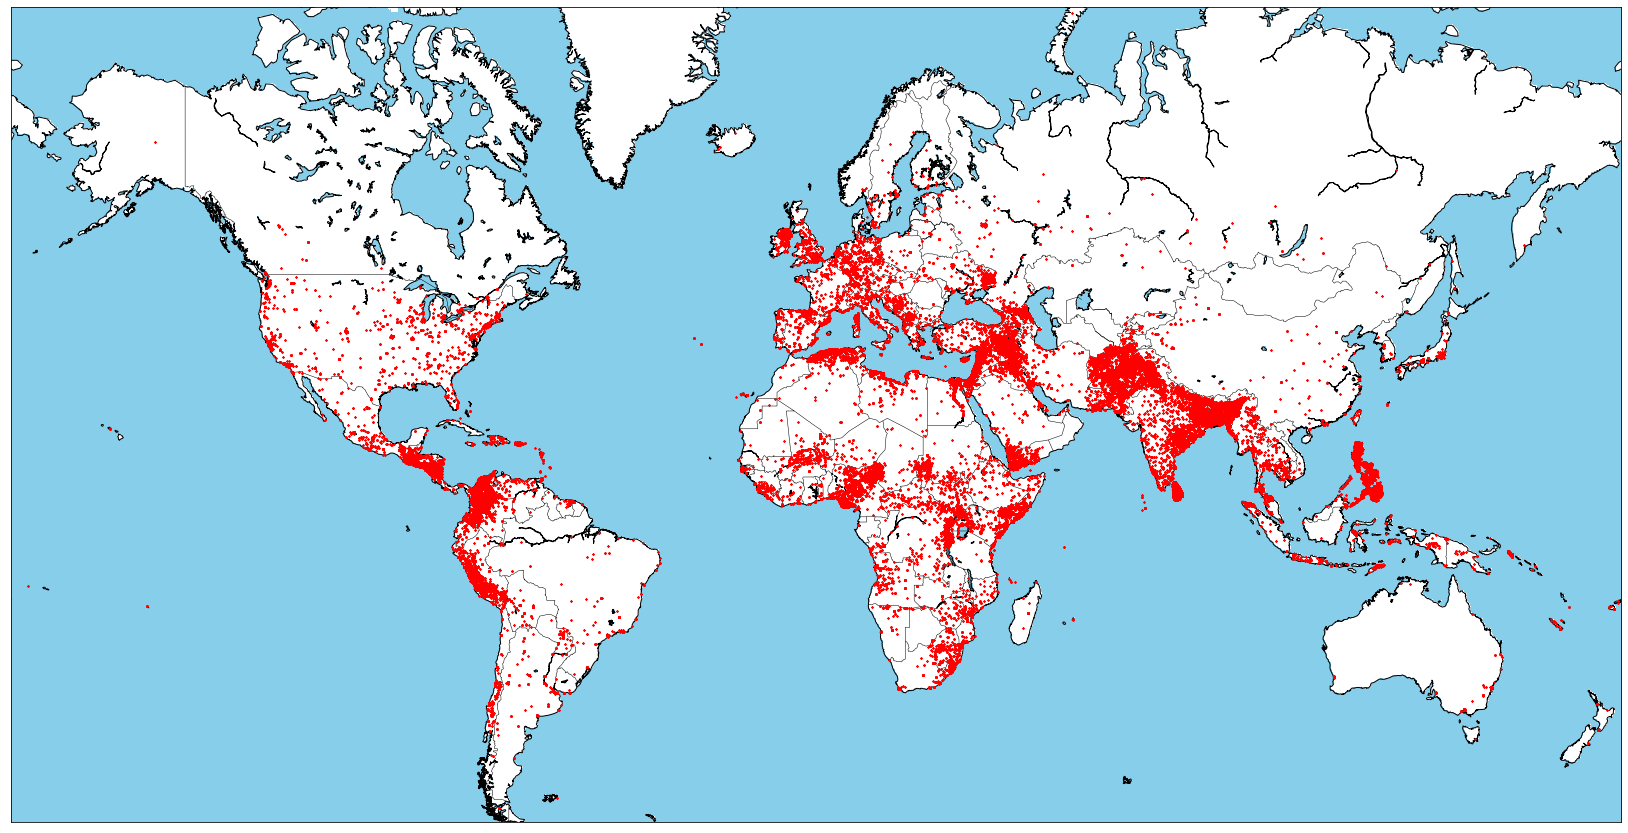

In [36]:
plt.subplots(figsize = (40,15))
my_map.drawcoastlines()
my_map.drawcountries()

my_map.drawlsmask(land_color='white', ocean_color='skyblue')

xs,ys = my_map(np.asarray(map.longitude), np.asarray(map.latitude))
map['x']= xs.tolist()
map['y'] =ys.tolist()

for index,row in map.iterrows():
  my_map.plot(row.x,row.y,markerfacecolor='red',
              markeredgecolor='red',marker='*',markersize=2)


In [37]:
# geographical distribution of the terrorist attacks are represented above 